In [2]:
import pandas as pd
pd.options.display.max_columns = None
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sidetable
import math
from wordcloud import WordCloud
import random

plt.rcParams["figure.figsize"] = (10,8)

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_palette("husl", 9)

In [3]:
df = pd.read_csv("Archivos/profesionales_nonull.csv", index_col= 0)

In [4]:
df_completo = pd.read_csv("Archivos/archivo_limpio.csv", index_col= 0)

In [5]:
no_prof = pd.read_csv("Archivos/noprof.csv", index_col= 0)

In [12]:
df_noprof = pd.read_csv("Archivos/no_profesionales.csv", index_col= 0)

In [6]:
def data_pregunta(dataf, colum):  # funcion para hacer df con la columna que queremos separar
    df = dataf[["edad", "genero", "pais", "estudios", "puesto_trabajo", "experiencia", "salario",colum]]
    df[colum] = df[colum].str.split(",")
    df = df.explode(colum)
    return df

In [13]:
def data_pregunta2(dataf, colum):
    df = dataf[["genero", "puesto_trabajo", colum]]
    df[colum] = df[colum].str.split(",")
    df = df.explode(colum)
    return df

In [14]:
df_q29b_noprof = data_pregunta2(df_noprof, 'q29b_productos_familiar_cloud_computing')
df_q32b_noprof = data_pregunta2(df_noprof, 'q32b_productos_familiar_bd')
df_q34b_noprof = data_pregunta2(df_noprof, 'q34b_herramientas_familiar_bi')
df_q37b_noprof = data_pregunta2(df_noprof, 'q37b_cat_herramientas_familiar_ml_aut')


/tmp/ipykernel_269/2452017766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")
/tmp/ipykernel_269/2452017766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")
/tmp/ipykernel_269/2452017766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [15]:
df_q29b_prof = data_pregunta(df, 'q29b_productos_familiar_cloud_computing')
df_q32b_prof = data_pregunta(df, 'q32b_productos_familiar_bd')
df_q34b_prof = data_pregunta(df, 'q34b_herramientas_familiar_bi')
df_q37b_prof = data_pregunta(df, 'q37b_cat_herramientas_familiar_ml_aut')

/tmp/ipykernel_269/1325171681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")
/tmp/ipykernel_269/1325171681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")
/tmp/ipykernel_269/1325171681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

---
### PRODUCTOS DE CLOUD COMPUTING
---

In [16]:
orden_q29b = df_q29b_noprof['q29b_productos_familiar_cloud_computing'].value_counts().index.tolist()

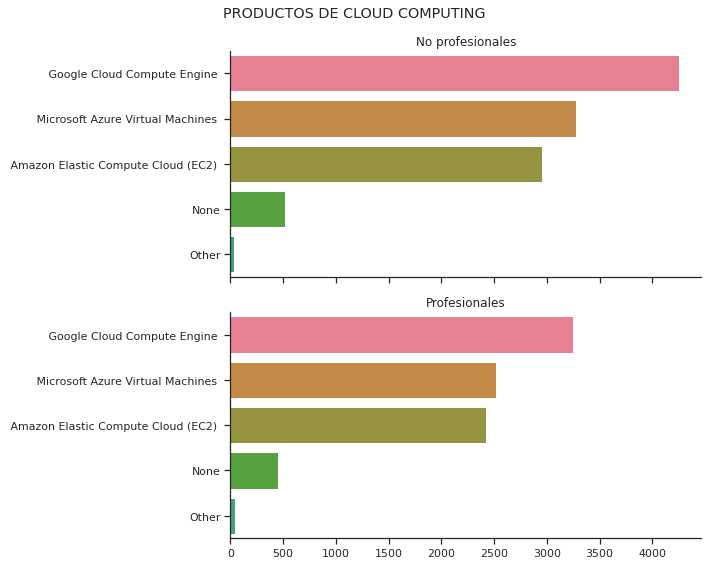

In [17]:
fig, axes = plt.subplots(2,1, sharex= True)

sns.countplot(data = df_q29b_noprof, y = 'q29b_productos_familiar_cloud_computing', ax = axes[0], order= orden_q29b)
sns.countplot(data = df_q29b_prof, y = 'q29b_productos_familiar_cloud_computing', ax = axes[1], order= orden_q29b)

fig.suptitle("PRODUCTOS DE CLOUD COMPUTING")
axes[0].set_title("No profesionales")
axes[1].set_title("Profesionales")

axes[0].set(xlabel=None)
axes[0].set(ylabel=None)
axes[1].set(xlabel=None)
axes[1].set(ylabel=None)

plt.tight_layout()
plt.show();

---
### PRODUCTOS BIG DATA
---

In [18]:
orden_q32b = df_q32b_noprof['q32b_productos_familiar_bd'].value_counts()[:5].index.tolist()

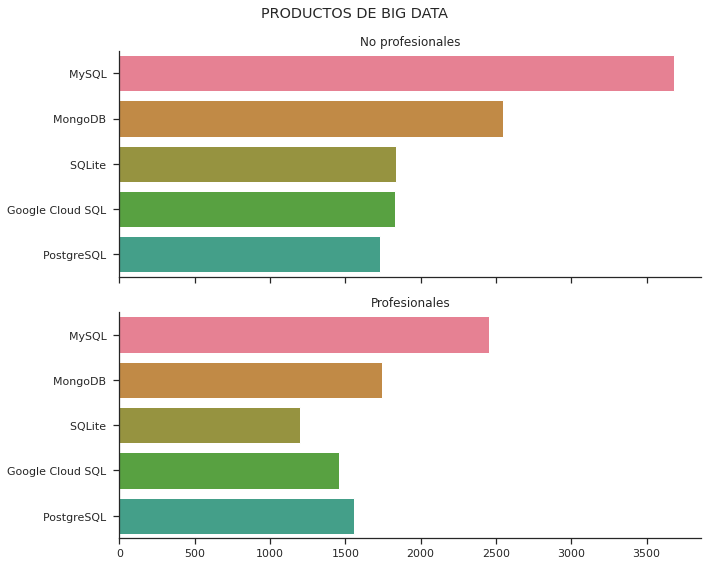

In [19]:
fig, axes = plt.subplots(2,1, sharex= True)

sns.countplot(data = df_q32b_noprof, y = 'q32b_productos_familiar_bd', ax = axes[0], order= orden_q32b)
sns.countplot(data = df_q32b_prof, y = 'q32b_productos_familiar_bd', ax = axes[1], order= orden_q32b)

fig.suptitle("PRODUCTOS DE BIG DATA")
axes[0].set_title("No profesionales")
axes[1].set_title("Profesionales")

axes[0].set(xlabel=None)
axes[0].set(ylabel=None)
axes[1].set(xlabel=None)
axes[1].set(ylabel=None)

plt.tight_layout()
plt.show();

---
### HERRAMIENTAS DE BUSINESS INTELLIGENCE
---

In [20]:
orden_q34b = df_q34b_noprof['q34b_herramientas_familiar_bi'].value_counts()[:5].index.tolist()

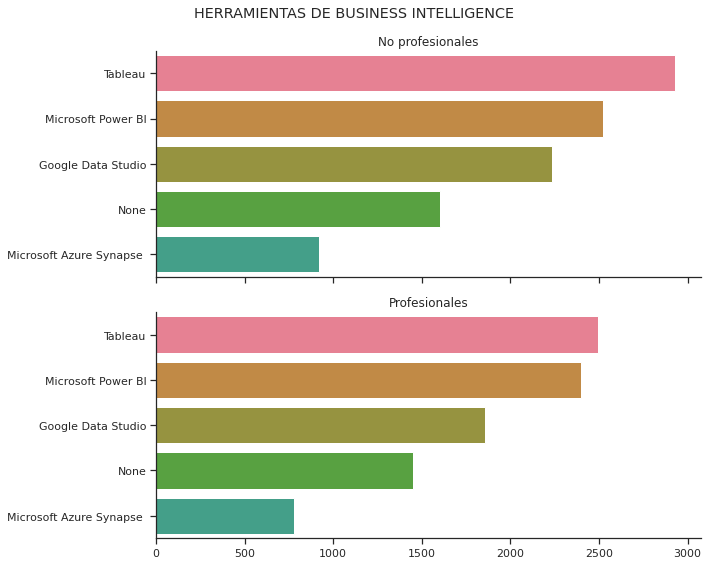

In [21]:
fig, axes = plt.subplots(2,1, sharex= True)

sns.countplot(data = df_q34b_noprof, y = 'q34b_herramientas_familiar_bi', ax = axes[0], order= orden_q34b)
sns.countplot(data = df_q34b_prof, y = 'q34b_herramientas_familiar_bi', ax = axes[1], order= orden_q34b)

fig.suptitle("HERRAMIENTAS DE BUSINESS INTELLIGENCE")
axes[0].set_title("No profesionales")
axes[1].set_title("Profesionales")

axes[0].set(xlabel=None)
axes[0].set(ylabel=None)
axes[1].set(xlabel=None)
axes[1].set(ylabel=None)

plt.tight_layout()
plt.show();

---
### HERRAMIENTAS DE MACHINE LEARNING AUTOMATIZADAS
---

In [22]:
orden_q37b = df_q37b_noprof['q37b_cat_herramientas_familiar_ml_aut'].value_counts()[:5].index.tolist()

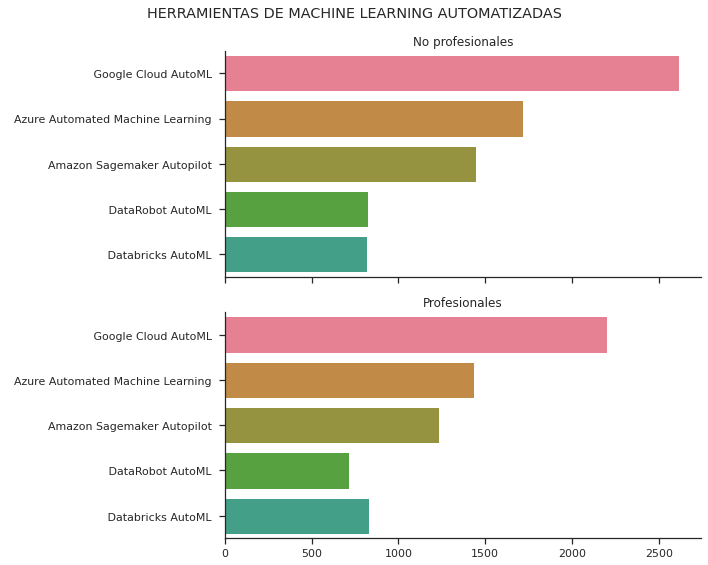

In [23]:
fig, axes = plt.subplots(2,1, sharex= True)

sns.countplot(data = df_q37b_noprof, y = 'q37b_cat_herramientas_familiar_ml_aut', ax = axes[0], order= orden_q37b)
sns.countplot(data = df_q37b_prof, y = 'q37b_cat_herramientas_familiar_ml_aut', ax = axes[1], order= orden_q37b)

fig.suptitle("HERRAMIENTAS DE MACHINE LEARNING AUTOMATIZADAS")
axes[0].set_title("No profesionales")
axes[1].set_title("Profesionales")

axes[0].set(xlabel=None)
axes[0].set(ylabel=None)
axes[1].set(xlabel=None)
axes[1].set(ylabel=None)

plt.tight_layout()
plt.show();

---

### Principales herramientas de trabajo

---

In [37]:
# Creamos un DF ejecutando la función data_pregunta
df_visualizacion = data_pregunta(df, "herramientas_visualizacion")

/tmp/ipykernel_627/1325171681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")


In [38]:
# Creamos una lista para ordenar la gráfica por cantidad de votos
lista_ordenada = df_visualizacion["herramientas_visualizacion"].value_counts().index.tolist()

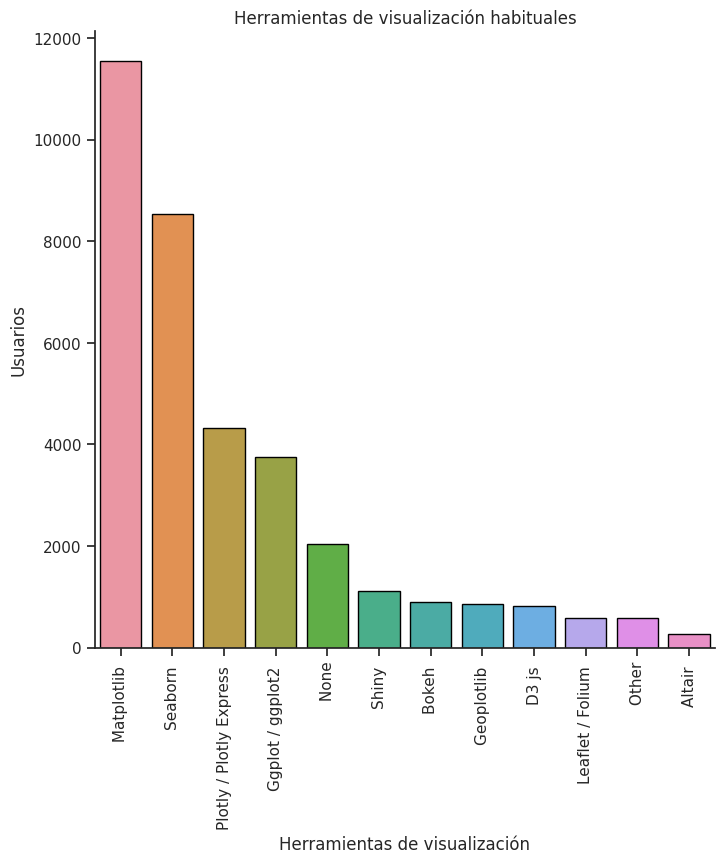

In [39]:
# Realizamos un countplot para visualizar las librerias de visualización más usadas
plt.figure(figsize =(8,8))
fig = sns.countplot(x= "herramientas_visualizacion", data= df_visualizacion, order= lista_ordenada, edgecolor ='black')
plt.title(label = "Herramientas de visualización habituales")
fig.set(xlabel='Herramientas de visualización', ylabel = 'Usuarios')
plt.xticks(rotation = 90)
plt.show()

In [40]:
list_herr = df_visualizacion["herramientas_visualizacion"].value_counts()[:4].index.tolist()

In [41]:
list_herr

[' Matplotlib ', 'Seaborn ', 'Plotly / Plotly Express ', 'Ggplot / ggplot2 ']

In [42]:
# Creamos un df filtrando por la lista con las librerías más habituales
df_herramientas = df_visualizacion.loc[df_visualizacion["herramientas_visualizacion"].isin(list_herr)]

In [43]:
df_herramientas.herramientas_visualizacion.unique()

array([' Matplotlib ', 'Seaborn ', 'Ggplot / ggplot2 ',
       'Plotly / Plotly Express '], dtype=object)

In [44]:
lista_ordenada2 = df_herramientas["herramientas_visualizacion"].value_counts().index.tolist()

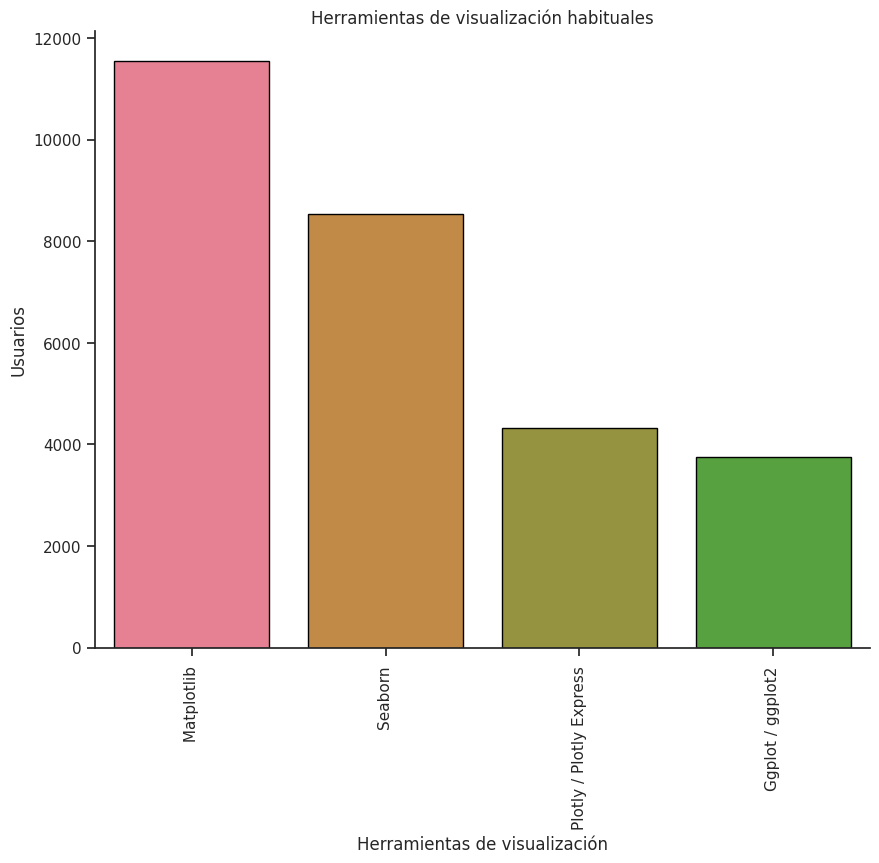

In [45]:
# Realizamos un countplot para visualizar las librerias de visualización más habituales
fig = sns.countplot(x= "herramientas_visualizacion", data= df_herramientas, order= lista_ordenada2, edgecolor ='black')
plt.title(label = "Herramientas de visualización habituales")
fig.set(xlabel='Herramientas de visualización', ylabel = 'Usuarios')
plt.xticks(rotation = 90)
plt.show()

---
### Lenguajes que recomiendan los usuarios
---

In [46]:
lista_ordenada_leng = df["lenguaje_recomendado"].value_counts().index.tolist()

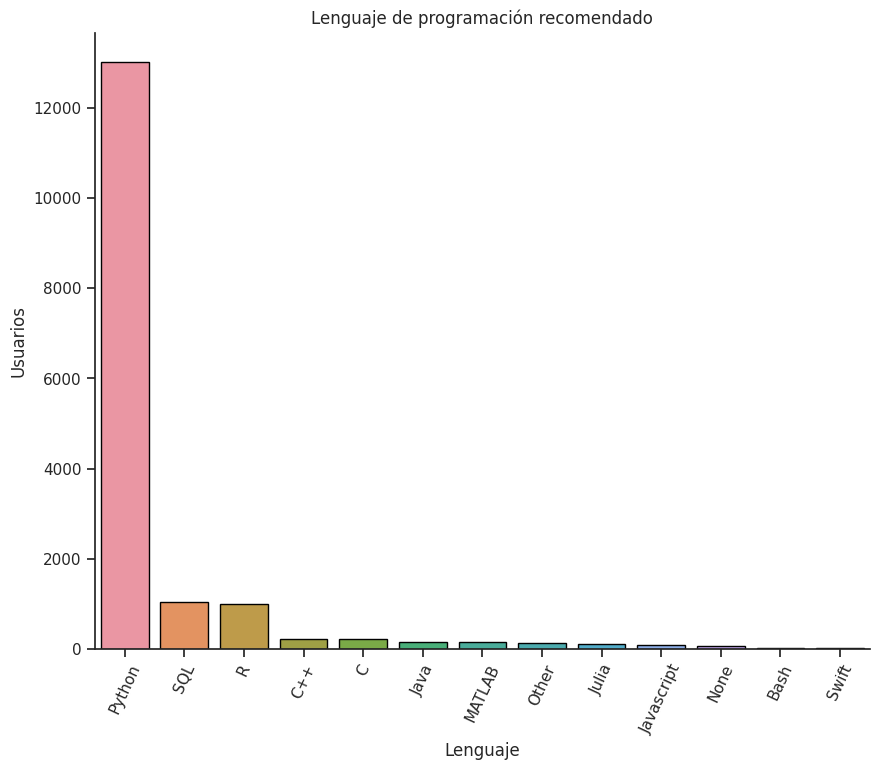

In [47]:
fig = sns.countplot(x= "lenguaje_recomendado", data= df, order= lista_ordenada_leng,  edgecolor ='black')
fig.set(xlabel='Lenguaje', ylabel = 'Usuarios')
plt.title(label = "Lenguaje de programación recomendado")
plt.xticks(rotation = 65)
plt.show()

In [48]:
list_leng = df["lenguaje_recomendado"].value_counts()[:3].index.tolist()

In [49]:
df_lenguaje = df.loc[df["lenguaje_recomendado"].isin(list_leng)]

In [50]:
lista_ordenada_leng2 = df_lenguaje["lenguaje_recomendado"].value_counts().index.tolist()

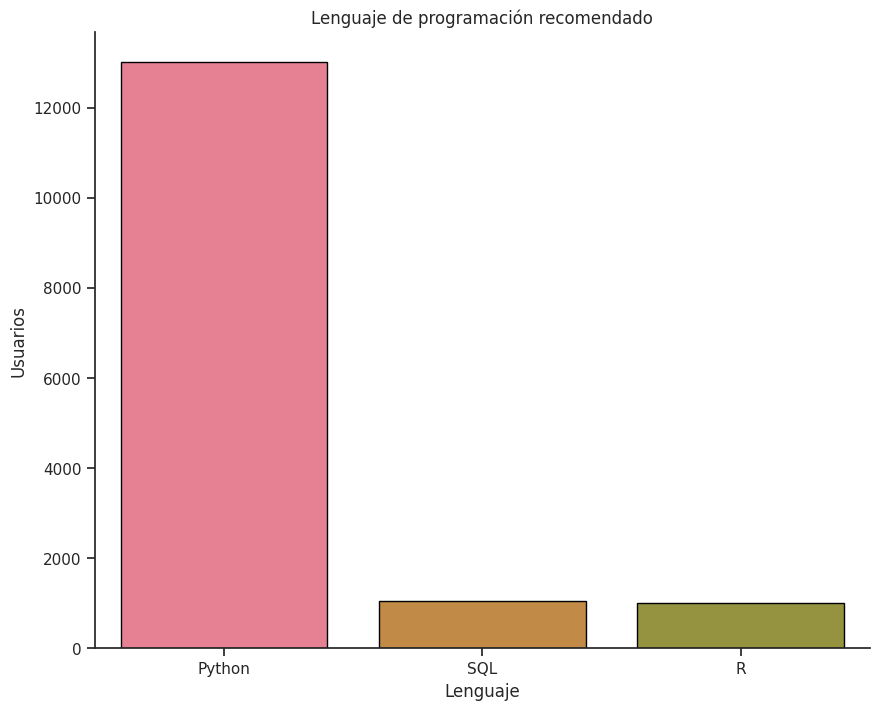

In [51]:
fig = sns.countplot(x= "lenguaje_recomendado", data= df_lenguaje, order= lista_ordenada_leng2,  edgecolor ='black')
fig.set(xlabel='Lenguaje', ylabel = 'Usuarios')
plt.title(label = "Lenguaje de programación recomendado")
plt.show()

In [52]:
df_lenguaje2 =df.stb.freq(["lenguaje_recomendado"], thresh= 93, other_label= "otros")

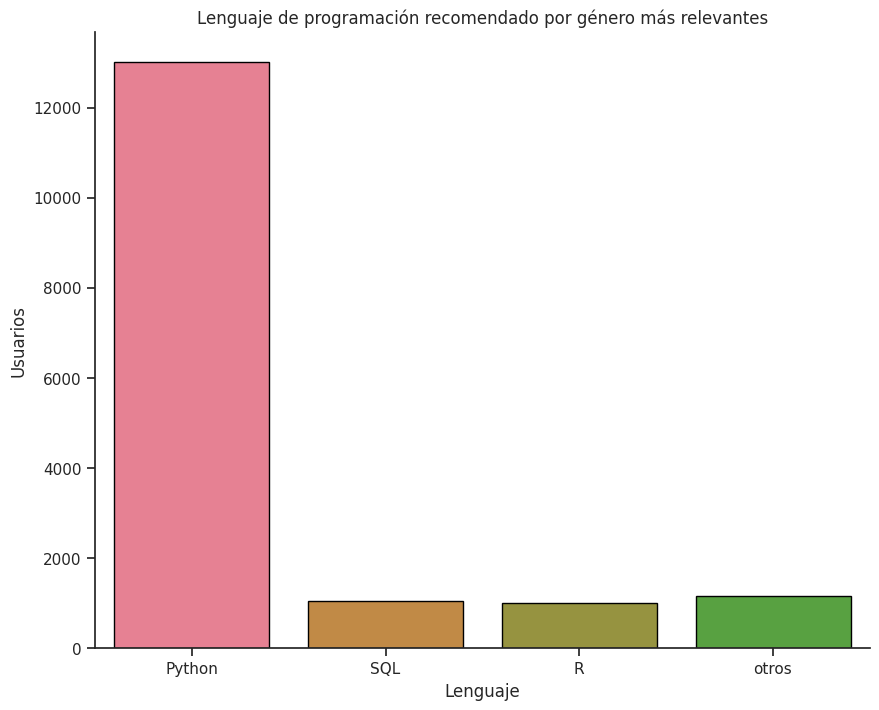

In [53]:
fig = sns.barplot(x= "lenguaje_recomendado", data= df_lenguaje2, y= "count", edgecolor ='black')
fig.set(xlabel='Lenguaje', ylabel = 'Usuarios')
plt.title(label = "Lenguaje de programación recomendado por género más relevantes")
plt.show()

---

### Sitios donde se comparte

---

In [54]:
df_plataforma =data_pregunta(df,'q39_plat_compartir_trabajo')
lista_plataformas = df_plataforma['q39_plat_compartir_trabajo'].value_counts()[:4].index.tolist()
df_plat_mas = df_plataforma.loc[df_plataforma['q39_plat_compartir_trabajo'].isin(lista_plataformas)]

/tmp/ipykernel_627/1325171681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")


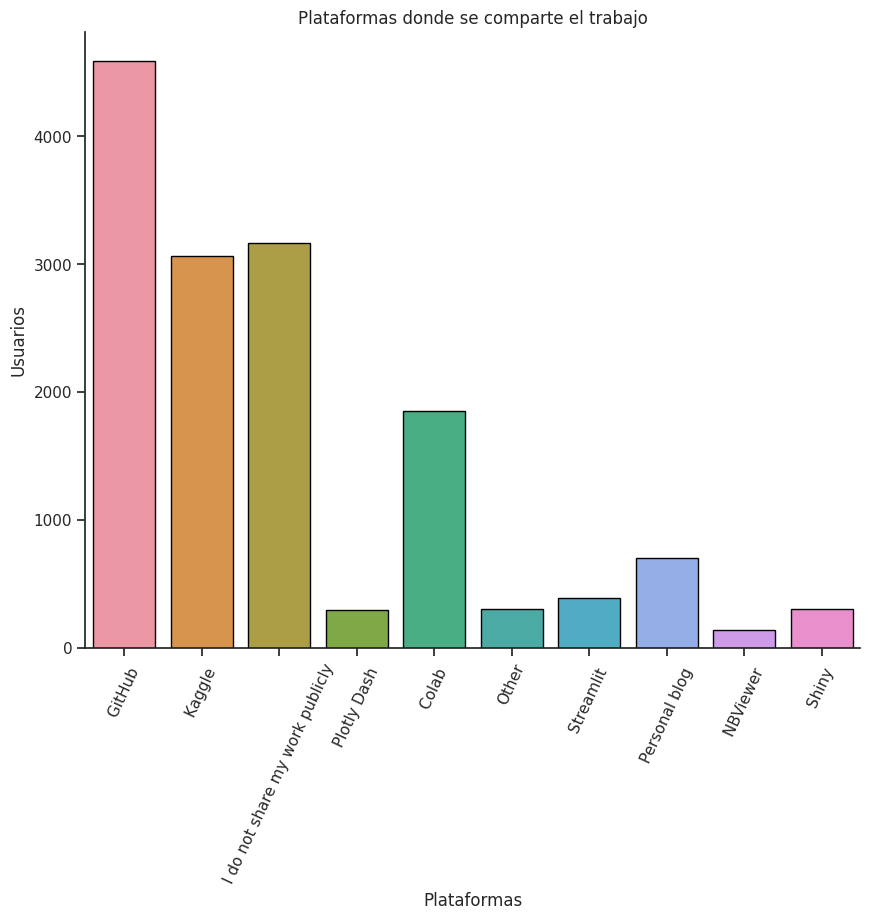

In [55]:
#Gráfica de Plataformas donde se comparte públicamente el trabajo
plt.figure(figsize=(10,8))
fig = sns.countplot(x = 'q39_plat_compartir_trabajo', data = df_plataforma, edgecolor ='black')
fig.set(xlabel='Plataformas', ylabel = 'Usuarios')
plt.xticks(rotation = 65)
plt.title(label = "Plataformas donde se comparte el trabajo")
plt.show()

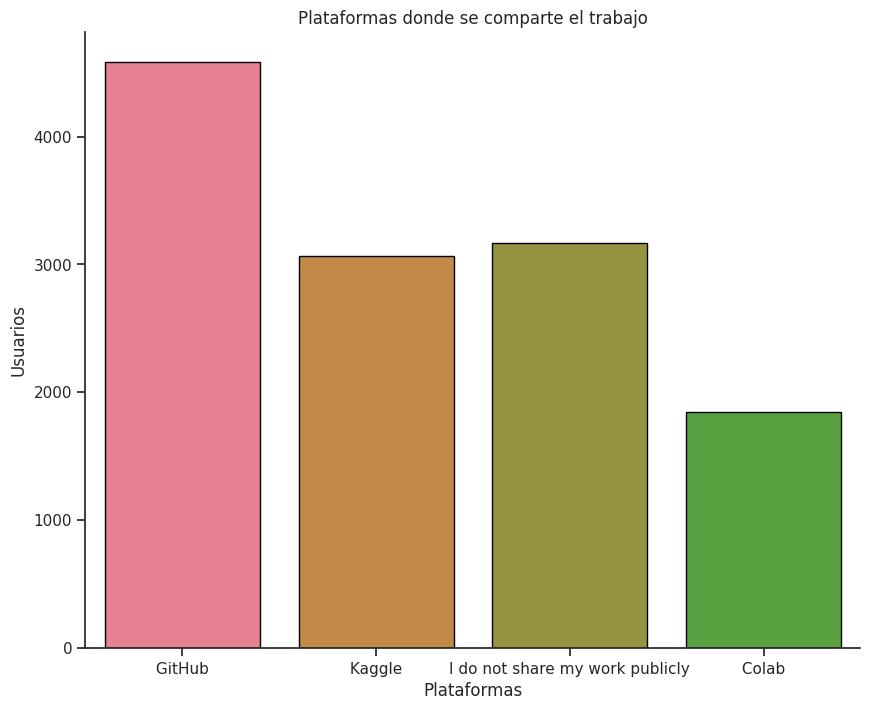

In [56]:
#Gráfica de Plataformas donde se comparte públicamente el trabajo
plt.figure(figsize=(10,8))
fig = sns.countplot(x = 'q39_plat_compartir_trabajo', data = df_plat_mas, edgecolor ='black')
fig.set(xlabel='Plataformas', ylabel = 'Usuarios')
plt.title(label = "Plataformas donde se comparte el trabajo")
plt.show()

---

### Plataformas cursos

---

In [57]:
# Uso de la función
df_cursos = data_pregunta(df,"q40_plat_cursos")

/tmp/ipykernel_627/1325171681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")


In [58]:
# Creamos una lista para ordenar la gráfica por cantidad de votos
lista_3 = df_cursos["q40_plat_cursos"].value_counts().index.tolist()

In [ ]:
lista_3 = df_cursos["q40_plat_cursos"].value_counts()

🚨🚨🚨 REVISAR PORQUE ESTÁ EL NOMBRE DE LAS COLUMNAS MAL SEPARADAS POR LAS COMAS ENTRE PARÉNTESIS

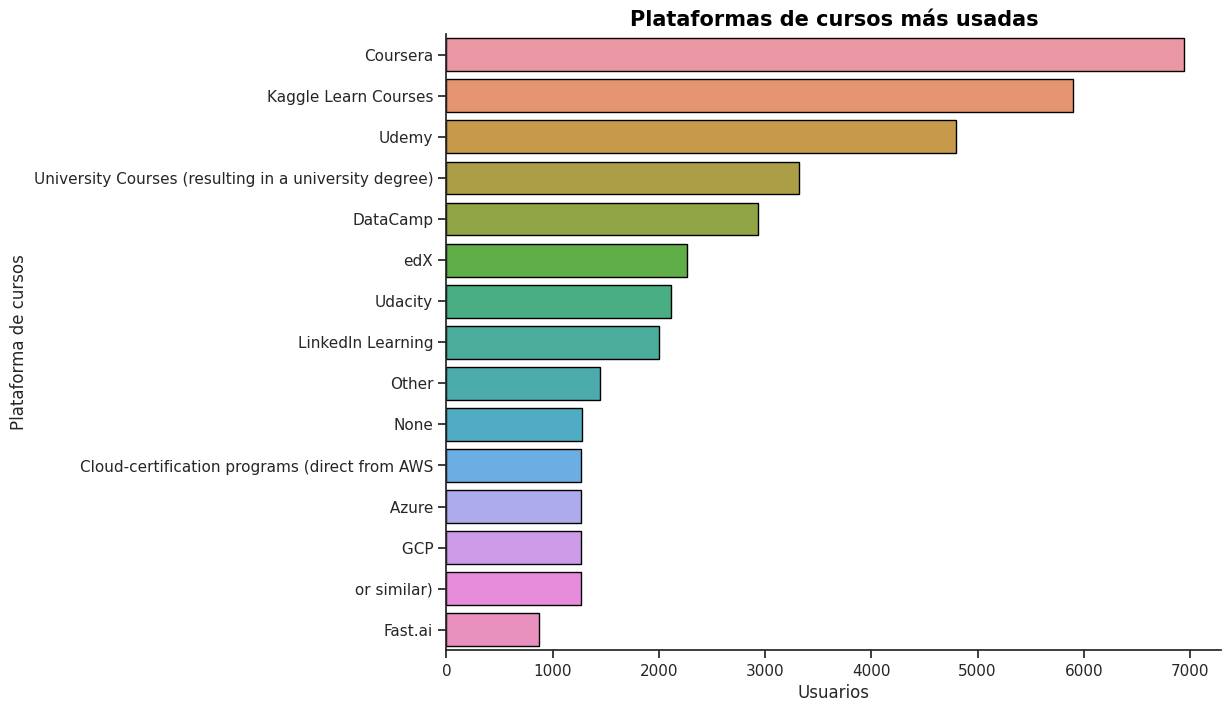

In [62]:
# Realizamos un countplot para visualizar las más usadas
fig = sns.countplot(y= "q40_plat_cursos", data= df_cursos, order= lista_3, edgecolor ='black')
fig.set(xlabel='Usuarios', ylabel = 'Plataforma de cursos')
plt.title(label = "Plataformas de cursos más usadas", color = "black", fontweight='bold', fontsize = 15)
plt.show()

In [ ]:
lista_columnas=["edad", "genero", "pais", "estudios", "puesto_trabajo", "experiencia", "salario"]
lista_cursos = df_cursos['q40_plat_cursos'].value_counts()[:4].index.tolist()
df_cursos_mas = df_cursos.loc[df_cursos['q40_plat_cursos'].isin(lista_cursos)]

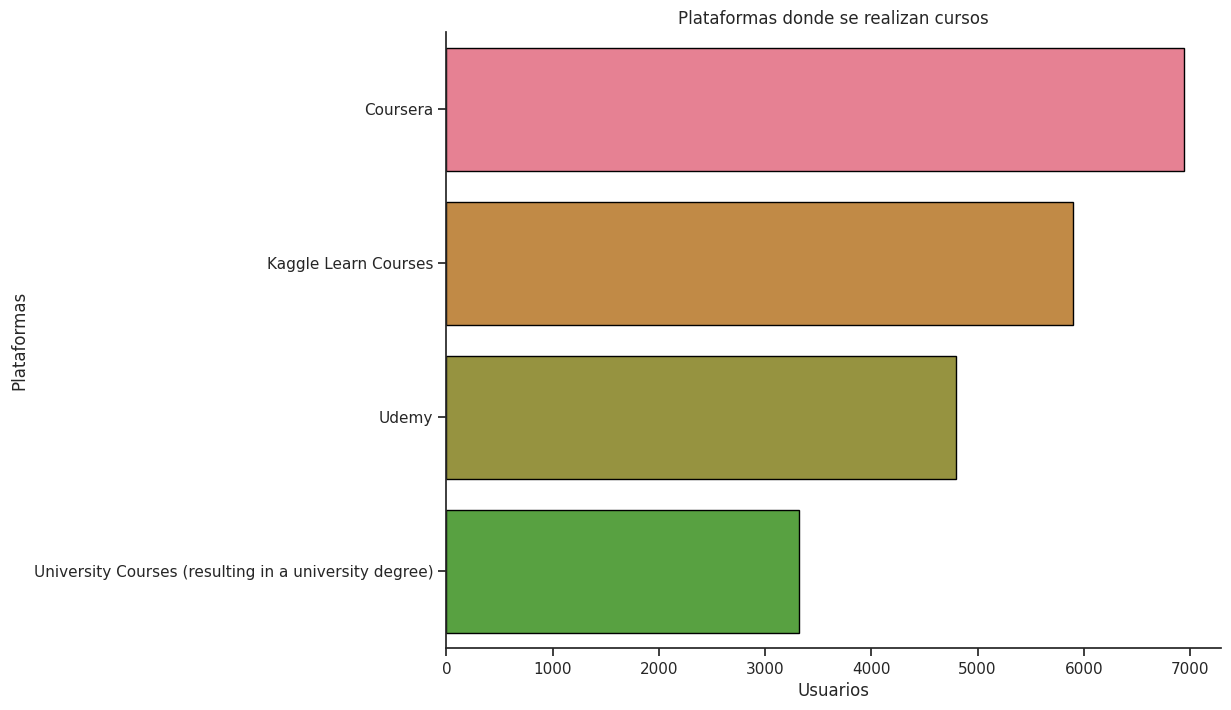

In [ ]:
fig = sns.countplot(y = 'q40_plat_cursos', data =df_cursos_mas, edgecolor ='black')
fig.set(ylabel='Plataformas', xlabel = 'Usuarios')
plt.title(label = "Plataformas donde se realizan cursos")
plt.show()

---

### Preguntas B

---

---

### Análisis de variables genéricas (puestos de trabajo, salario, edad)

---


In [ ]:
def limpiar(col):
    try:
        return col.replace("+","").split("-")[0]
    except:
        return col

In [ ]:
#Creamos una nueva columna edad_num con la columna edad en tipo numérico
df["edad_num"] = df["edad"].apply(limpiar).astype("float64", errors= "raise")

In [ ]:
def truncar(col):
    return math.trunc(col)

In [ ]:
# Quitamos los decimales de la columna salario
df["salario"] = df['salario'].apply(truncar).astype("float64", errors= "raise")

In [ ]:
#Filtramos df para quitar los datos de género = other
df_grafica =df[ df['genero'] != 'Other']

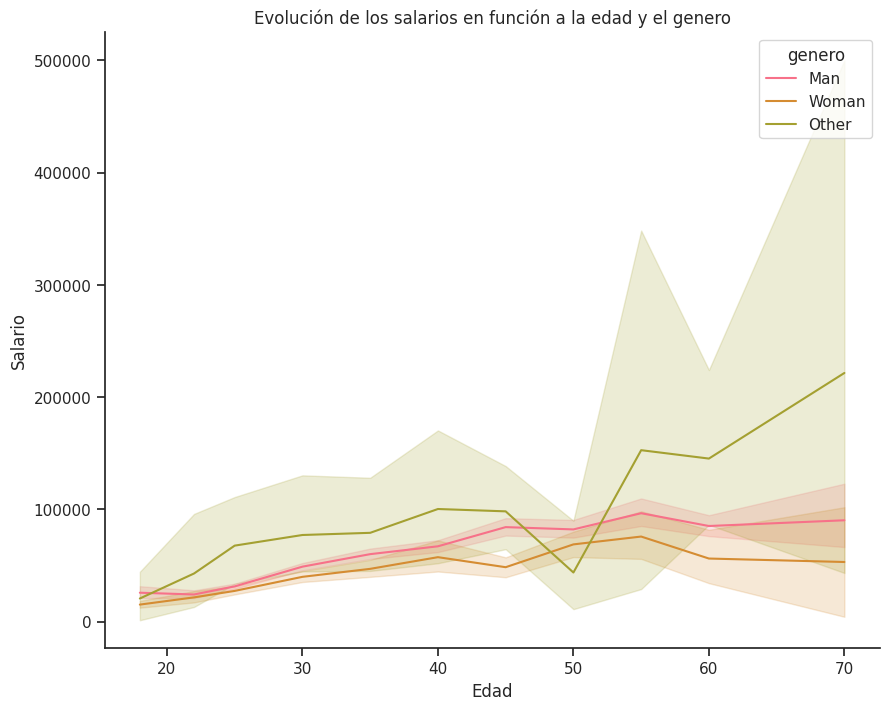

In [ ]:
fig = sns.lineplot(x='edad_num', y = 'salario', data = df, hue = 'genero')

# cambiamos el nombre de los ejes
fig.set(xlabel='Edad', ylabel = 'Salario')
# ponemos título a la gráfica
fig.set_title('Evolución de los salarios en función a la edad y el genero');

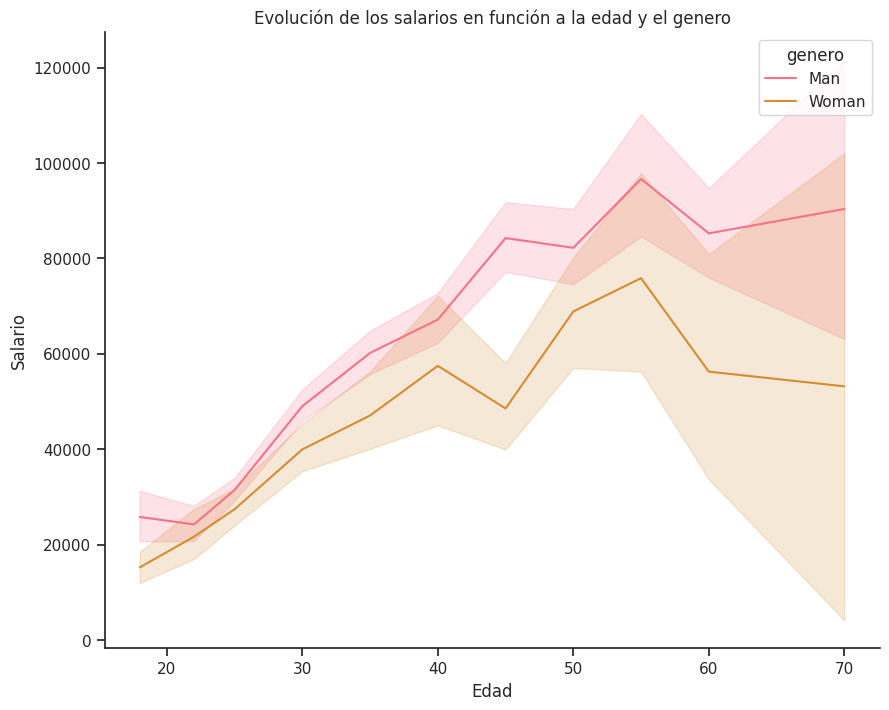

In [ ]:
fig = sns.lineplot(x='edad_num', y = 'salario', data = df_grafica, hue = 'genero')
# cambiamos el nombre de los ejes
fig.set(xlabel='Edad', ylabel = 'Salario')
# ponemos título a la gráfica
fig.set_title('Evolución de los salarios en función a la edad y el genero');

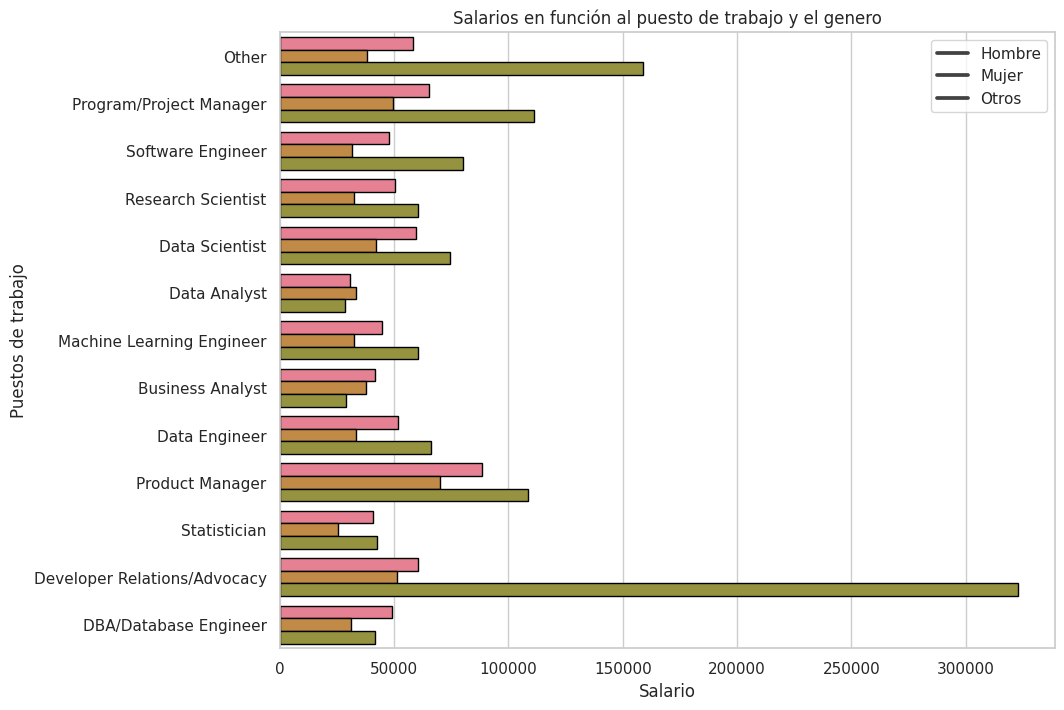

In [ ]:
with sns.axes_style("whitegrid"):
    fig = sns.barplot(y='puesto_trabajo', x = 'salario', data = df, hue='genero', errorbar=('ci',0), edgecolor ='black')
# cambiamos el nombre de los ejes
fig.set(xlabel='Salario', ylabel = 'Puestos de trabajo')
plt.legend(labels = ['Hombre', 'Mujer', 'Otros'])
# ponemos título a la gráfica
fig.set_title('Salarios en función al puesto de trabajo y el genero');

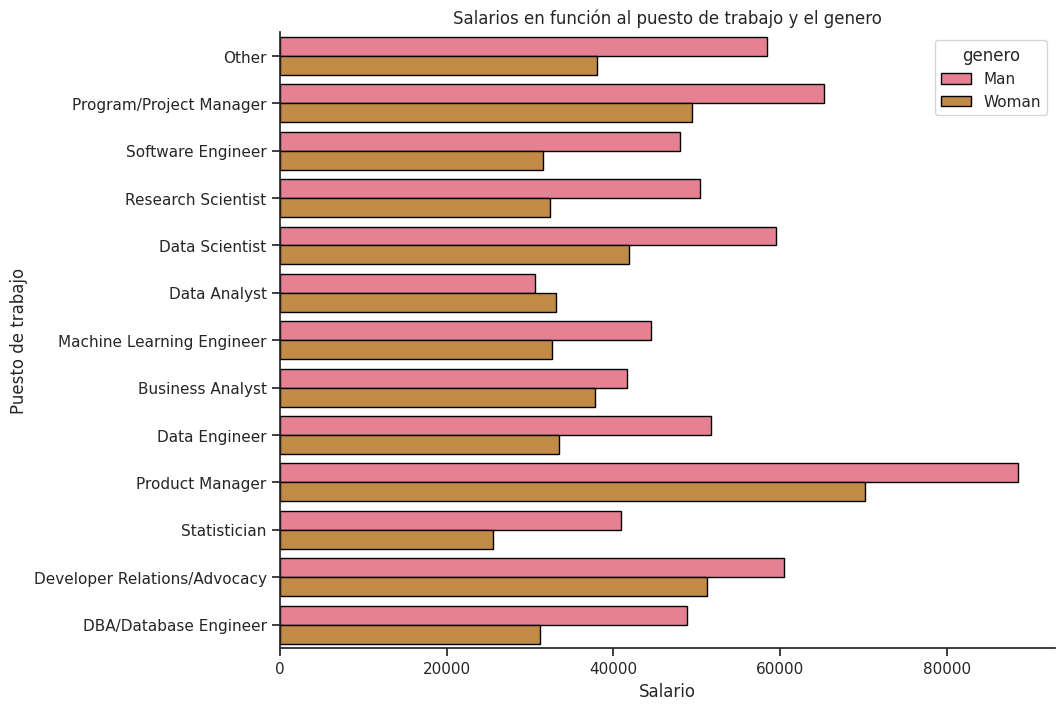

In [ ]:
fig = sns.barplot(y='puesto_trabajo', x = 'salario', data = df_grafica, hue='genero', errorbar=('ci',0), edgecolor ='black')
# cambiamos el nombre de los ejes
fig.set(xlabel='Salario', ylabel = 'Puesto de trabajo')
# ponemos título a la gráfica
fig.set_title('Salarios en función al puesto de trabajo y el genero');

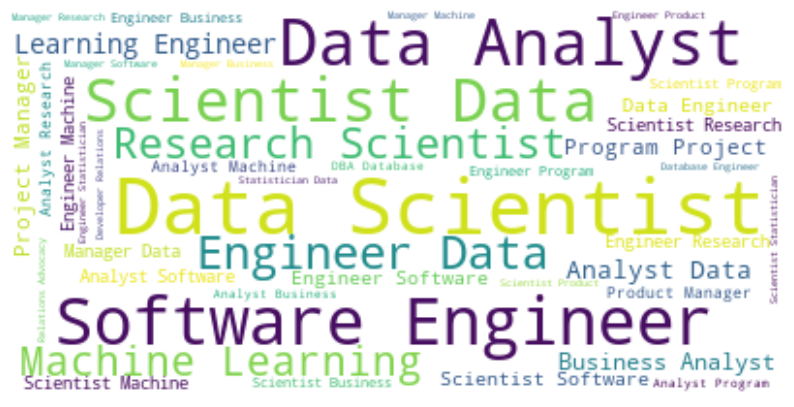

In [ ]:
text = " ".join(review for review in df.puesto_trabajo.astype(str))
# Read the whole text.
text = text

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=len(text),max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")

plt.show()

In [ ]:
fig = sns.swarmplot(x='puesto_trabajo', y = 'industria', data = df_grafica, hue='genero', edgecolor ='black')
# cambiamos el nombre de los ejes
fig.set(xlabel='Salario', ylabel = 'Puesto de trabajo')
# ponemos título a la gráfica
fig.set_title('Salarios en función al puesto de trabajo y el genero');

/home/pfuente/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 94.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/pfuente/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 84.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

In [ ]:
fig = sns.barplot(x='salario', y = 'industria', data = df_grafica, hue='genero', errorbar=('ci',0), edgecolor ='black')
# cambiamos el nombre de los ejes
fig.set(xlabel='Salario', ylabel = 'Industria')
# ponemos título a la gráfica
fig.set_title('Salarios en función a la industria y el genero', fontsize = 24);

NameError: name 'sns' is not defined